# Heart Stroke Prediction

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


## Data Preprocessing

In [3]:
df.drop('id', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,"5,110.00",43.23,22.61,0.08,25.00,45.00,61.00,82.00
hypertension,"5,110.00",0.10,0.30,0.00,0.00,0.00,0.00,1.00
heart_disease,"5,110.00",0.05,0.23,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,"5,110.00",106.15,45.28,55.12,77.25,91.88,114.09,271.74
bmi,"4,909.00",28.89,7.85,10.30,23.50,28.10,33.10,97.60
stroke,"5,110.00",0.05,0.22,0.00,0.00,0.00,0.00,1.00


In [6]:
#Checking for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#replacing the missing values with the most frequent value
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

#### Check values and their count in the columns

In [8]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


#### Replacing the values in columns with numerical values

- Residence Type: Urban = 1, Rural = 0
- Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
-   Ever_Maried : Yes = 1, No = 0
- Gender : Male = 1, Female = 0, Other = 2
- Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4

In [9]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)

## Exploratory Data Analysis

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,0,1,228.69,36.60,0,1
1,0,61.00,0,0,1,1,0,202.21,28.70,1,1
2,1,80.00,0,1,1,0,0,105.92,32.50,1,1
3,0,49.00,0,0,1,0,1,171.23,34.40,2,1
4,0,79.00,1,0,1,1,0,174.12,24.00,1,1


In [11]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.00,1,0,1,0,1,83.75,28.70,1,0
5106,0,81.00,0,0,1,1,1,125.20,40.00,1,0
5107,0,35.00,0,0,1,1,0,82.99,30.60,1,0
5108,1,51.00,0,0,1,0,0,166.29,25.60,0,0
5109,0,44.00,0,0,1,3,1,85.28,26.20,3,0


#### Find correlation between the variables

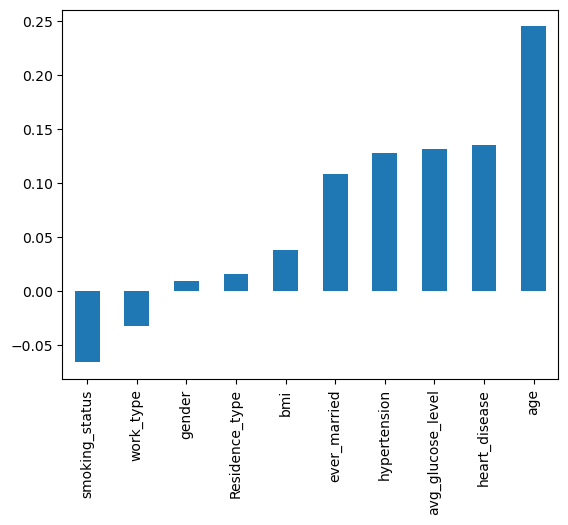

In [12]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')
plt.show()

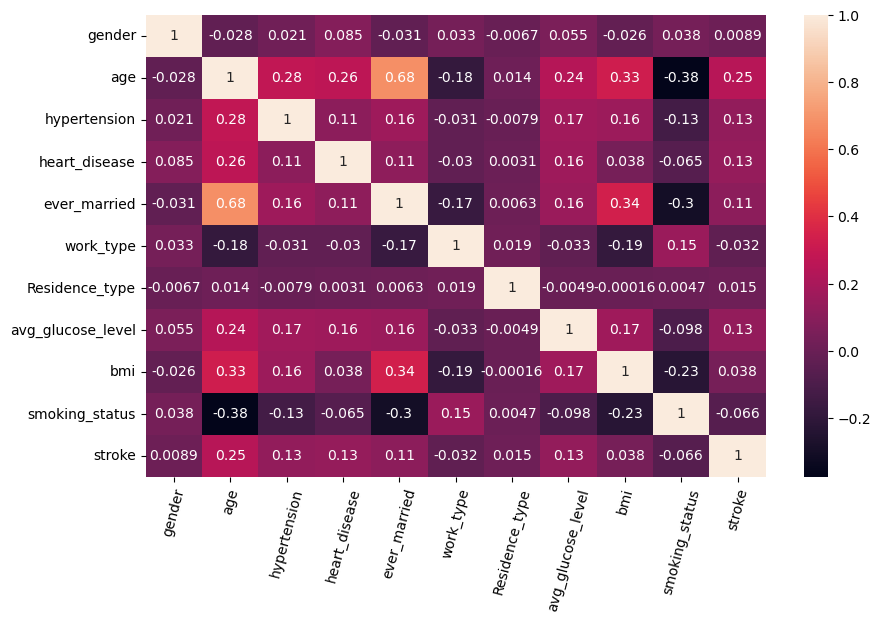

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=75)
plt.show()

In [14]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
df['age'] = pd.cut(x=df['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,0,1,228.69,36.60,0,1
1,0,4,0,0,1,1,0,202.21,28.70,1,1
2,1,4,0,1,1,0,0,105.92,32.50,1,1
3,0,3,0,0,1,0,1,171.23,34.40,2,1
4,0,4,1,0,1,1,0,174.12,24.00,1,1


In [15]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,4,1,0,1,0,1,83.75,28.70,1,0
5106,0,4,0,0,1,1,1,125.20,40.00,1,0
5107,0,3,0,0,1,1,0,82.99,30.60,1,0
5108,1,3,0,0,1,0,0,166.29,25.60,0,0
5109,0,3,0,0,1,3,1,85.28,26.20,3,0


## Visualizing the data

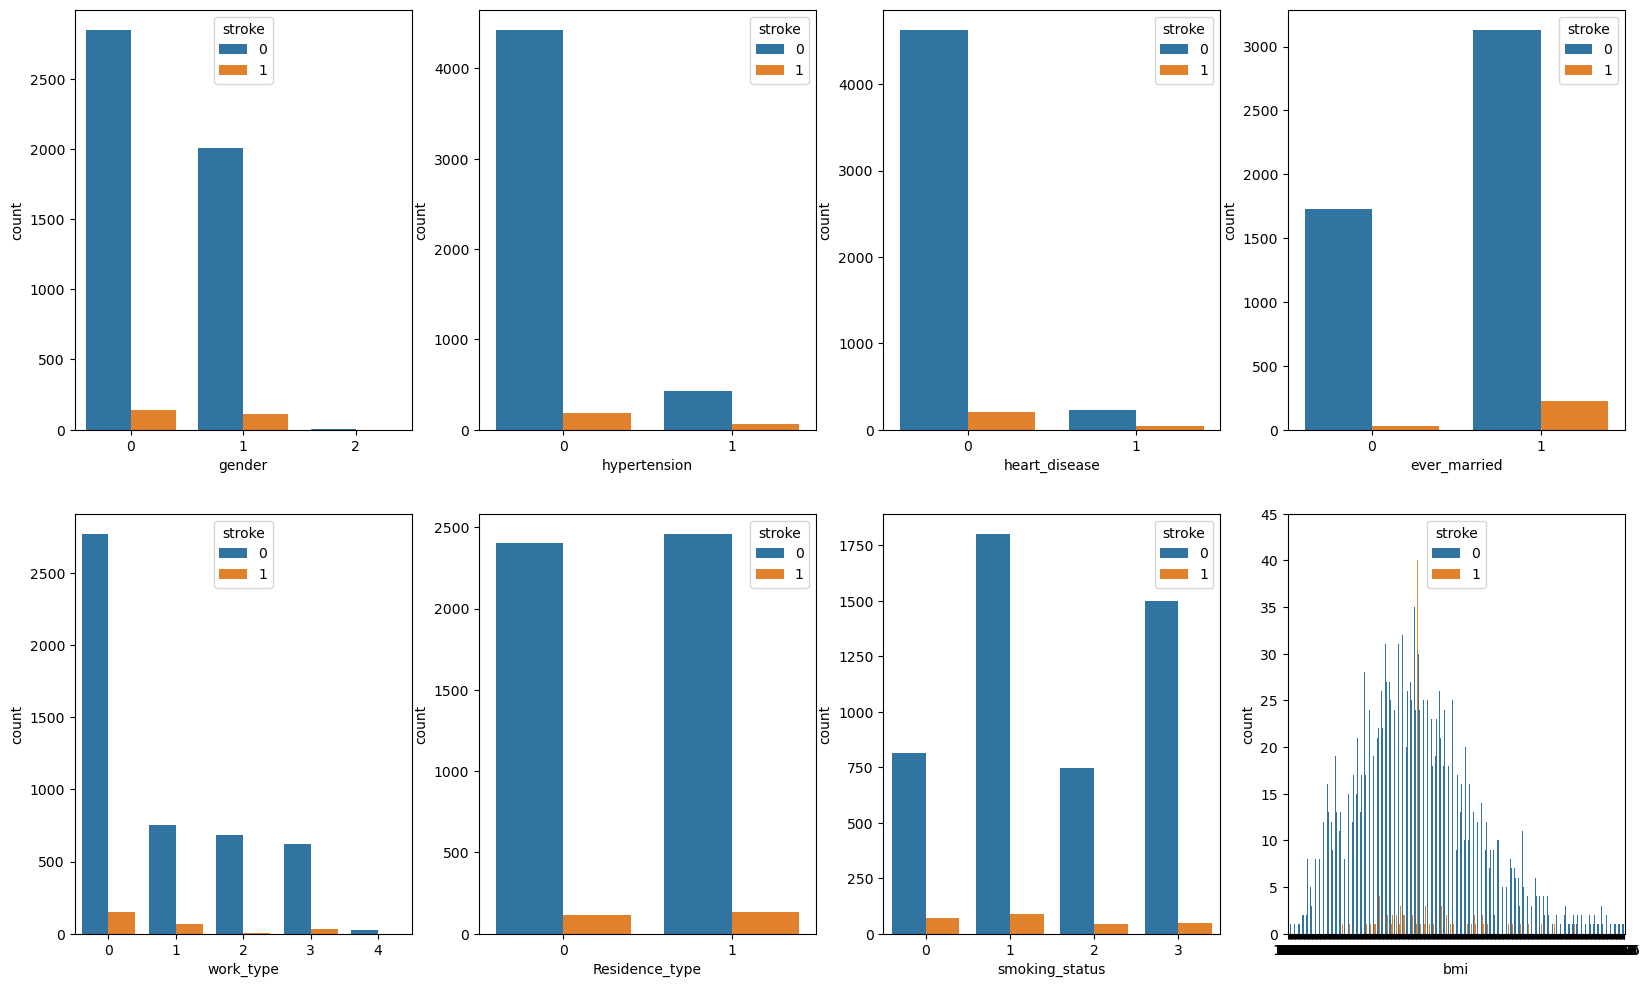

In [16]:
fig, ax = plt.subplots(2,4,figsize=(20, 12))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[0,1])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[0,2])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'bmi', data = df,hue = 'stroke', ax=ax[1,3])
ax[1, 3].set_ylim(0, 45)
plt.show()

## Train Test Split

In [17]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Decision Tree

In [18]:
model = DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

print(f'Accuracy on Training data : {training_data_accuracy *100:.2f}%')

Accuracy on Training data : 100.00%


In [21]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

print(f'Accuracy on Test data : {test_data_accuracy *100:.2f}%')

Accuracy on Test data : 91.59%


## Model Evaluation

### Decision Tree

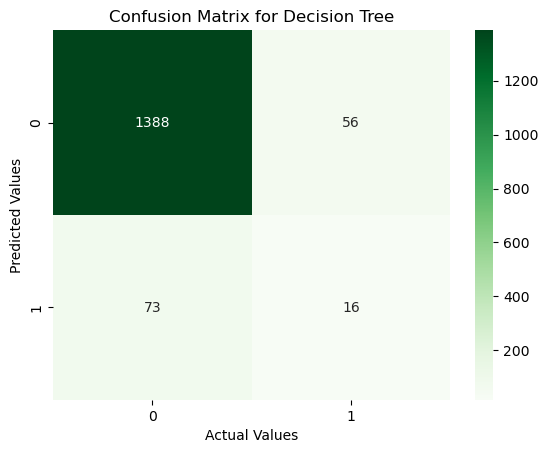

Decision Tree Model Accuracy: 91.59%
Decision Tree Model f1 score: 19.88%


In [22]:
sns.heatmap(confusion_matrix(y_test, X_test_prediction), annot=True, fmt="d", cmap='Greens')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

print(f'Decision Tree Model Accuracy: {accuracy_score(y_test, X_test_prediction)*100:.2f}%')
print(f'Decision Tree Model f1 score: {metrics.f1_score(y_test, X_test_prediction)*100:.2f}%')

## Conclusion

People who have a body mass index (BMI) between 25 and 50, are over 50 years old, and have heart diseases are more likely to suffer a stroke heart.

## Building a Predictive System

In [23]:
def prediction (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = model.predict(input_data_reshaped)
    
    print(f'The result is {prediction[0]}')

    if (prediction[0]== 0):
      print('Low chances of a heart attack')
    else:
      print('High chances of a heart attack')

In [24]:
input_data = (0,4,1,0,1,0,1,83.75,28.70,1)
prediction(input_data)

The result is 0
Low chances of a heart attack


In [25]:
input_data = (1,4,0,1,1,0,1,228.69,36.60,0)
prediction(input_data)

The result is 1
High chances of a heart attack
